In [153]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [154]:
from analysis_support import *

# Data acquisition

In [155]:
planners = [
    'halton.cp_sat.multi_edge',
    'halton.cp_sat.single_edge',
    'halton.a_star.multi_edge',
    'halton.a_star.single_edge',
    'uniform.cp_sat.multi_edge',
    'uniform.cp_sat.single_edge',
    'uniform.a_star.multi_edge',
    'uniform.a_star.single_edge',
]

In [156]:
tables = {}

for planner in planners:
    file_pattern = '{}/lazy_prm_bc.BARN.instance_*.json'.format(planner)
    # Halton results loading
    vanilla_results = collect_deterministic_results(file_pattern)
    table = tabulate_deterministic_results(vanilla_results)
    tables[planner] = table

Found 1500 result files
Missing results: 0
Found 1500 result files
Missing results: 0
Found 1480 result files
Missing results: 0
Found 1488 result files
Missing results: 0
Found 1500 result files
Missing results: 0
Found 1500 result files
Missing results: 0
Found 1455 result files
Missing results: 0
Found 1457 result files
Missing results: 0


# Coverage over time (full set)

In which we compare the rates at which planners solve instances as more time is allowed

In [157]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]
coverage = {}

for planner in planners:

    coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

    planning_time = tables[planner]['plan_time'].to_numpy()
    verification_time = tables[planner]['verif_time'].to_numpy()
    total_time = planning_time + verification_time

    for i in range(len(total_time)):
        for j in range(len(time_breakpoints)):
            if planning_time[i] <= time_breakpoints[j]:
                coverage_at_breakpoint[j] += 1
    print("{}: [{}]".format(planner, ", ".join(str(v) for v in coverage_at_breakpoint)))

    coverage[planner] = coverage_at_breakpoint

halton.cp_sat.multi_edge: [0, 247, 1147, 1336, 1481, 1491, 1500, 1500, 1500, 1500, 1500]
halton.cp_sat.single_edge: [0, 271, 1150, 1338, 1485, 1496, 1500, 1500, 1500, 1500, 1500]
halton.a_star.multi_edge: [1172, 1248, 1377, 1405, 1446, 1457, 1470, 1475, 1480, 1480, 1480]
halton.a_star.single_edge: [1147, 1218, 1361, 1387, 1431, 1449, 1475, 1481, 1488, 1488, 1488]
uniform.cp_sat.multi_edge: [0, 193, 1017, 1271, 1458, 1480, 1498, 1499, 1500, 1500, 1500]
uniform.cp_sat.single_edge: [0, 148, 1006, 1274, 1474, 1491, 1500, 1500, 1500, 1500, 1500]
uniform.a_star.multi_edge: [1061, 1130, 1247, 1286, 1357, 1386, 1427, 1441, 1455, 1455, 1455]
uniform.a_star.single_edge: [1030, 1106, 1252, 1283, 1371, 1393, 1436, 1445, 1457, 1457, 1457]


## Halton Sequence planners

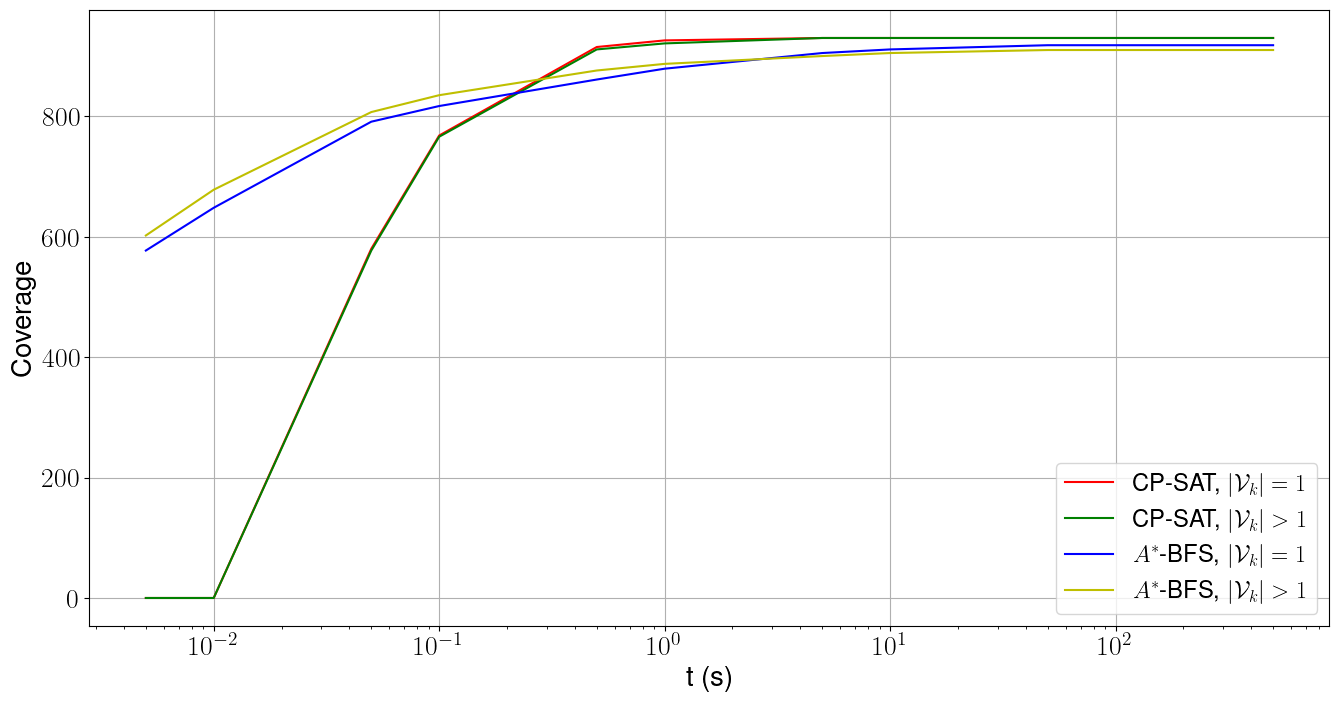

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(time_breakpoints, coverage['halton.cp_sat.single_edge'], 'r-', label=r'CP-SAT, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['halton.cp_sat.multi_edge'], 'g-', label=r'CP-SAT, $\vert {\cal V}_k \vert>1$')
ax.plot(time_breakpoints, coverage['halton.a_star.single_edge'], 'b-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['halton.a_star.multi_edge'], 'y-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert>1$')
ax.set_xscale('log')
ax.grid(True)

for l in ax.get_xticklabels():
    l.set_fontsize(20)
for l in ax.get_yticklabels():
    l.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.set_xlabel('t (s)')
ax.set_ylabel('Coverage')

ax.legend(loc=4, fontsize='xx-large')

plt.show()

There is barely any difference between CP-SAT when using multiple-edge cuts or otherwise. For A*-BFS there seems to be a small noticeable difference. Clearly, A*-BFS is fastest on most instances, but for the top 10% "hardest". While the DP planners plateau, CP-SAT planners pick up and solve every single instance in the benchmark.

## Uniform Sequence Planners

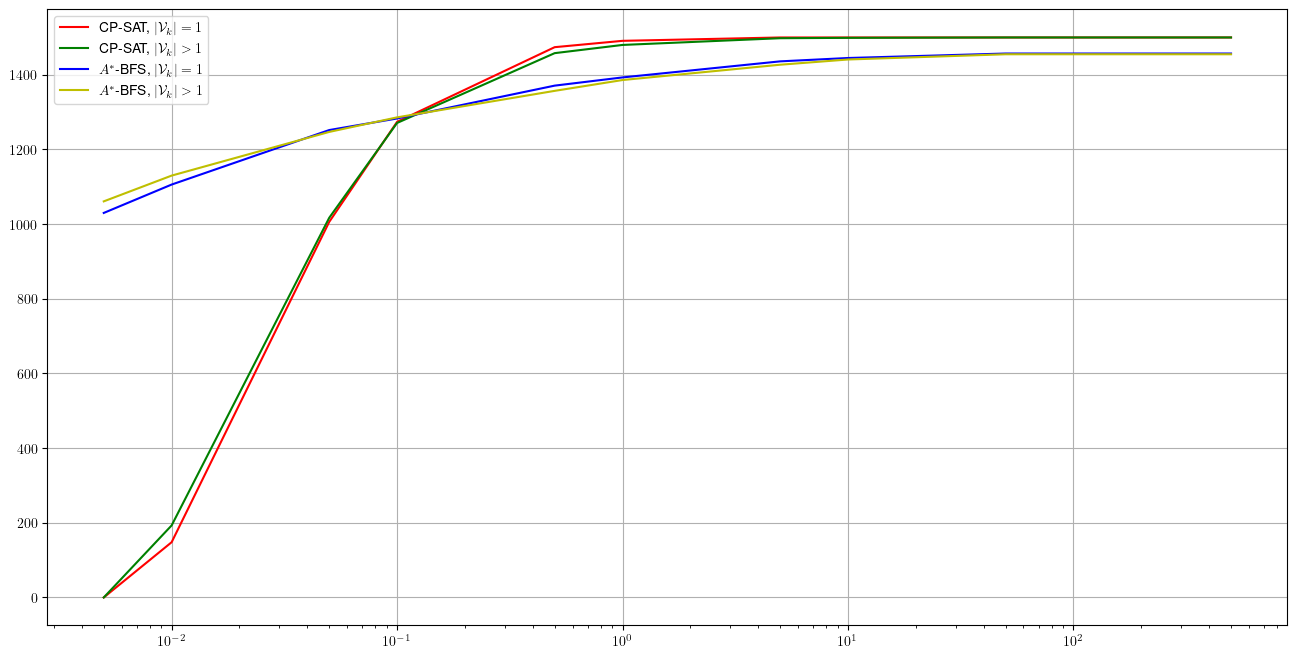

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(time_breakpoints, coverage['uniform.cp_sat.single_edge'], 'r-', label=r'CP-SAT, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['uniform.cp_sat.multi_edge'], 'g-', label=r'CP-SAT, $\vert {\cal V}_k \vert>1$')
ax.plot(time_breakpoints, coverage['uniform.a_star.single_edge'], 'b-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['uniform.a_star.multi_edge'], 'y-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert>1$')
ax.set_xscale('log')
ax.grid(True)
ax.legend()

plt.show()

When using uniform sampling, There does not seem to be much difference anyways. DP planners seem to have more trouble solving the whole benchmark when using uniform sampling rather than the deterministic Halton sequence. But still, the dynamics seem to be pretty much the same.

# Coverage over time (>1 iteration)

In which we compare planners coverage over time, but only over instances that require more than 1 iteration (about two-thirds of the whole benchmark).

In [160]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]
coverage = {}

for planner in planners:

    coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

    table = tables[planner]

    filtered_table = table[table['iterations']>1]

    planning_time = filtered_table['plan_time'].to_numpy()
    verification_time = filtered_table['verif_time'].to_numpy()
    total_time = planning_time + verification_time

    for i in range(len(total_time)):
        for j in range(len(time_breakpoints)):
            if planning_time[i] <= time_breakpoints[j]:
                coverage_at_breakpoint[j] += 1
    print("{}: [{}]".format(planner, ", ".join(str(v) for v in coverage_at_breakpoint)))

    coverage[planner] = coverage_at_breakpoint

halton.cp_sat.multi_edge: [0, 0, 577, 766, 911, 921, 930, 930, 930, 930, 930]
halton.cp_sat.single_edge: [0, 0, 580, 768, 915, 926, 930, 930, 930, 930, 930]
halton.a_star.multi_edge: [602, 678, 807, 835, 876, 887, 900, 905, 910, 910, 910]
halton.a_star.single_edge: [577, 648, 791, 817, 861, 879, 905, 911, 918, 918, 918]
uniform.cp_sat.multi_edge: [0, 0, 487, 741, 928, 950, 968, 969, 970, 970, 970]
uniform.cp_sat.single_edge: [0, 0, 477, 745, 945, 962, 971, 971, 971, 971, 971]
uniform.a_star.multi_edge: [537, 606, 723, 762, 833, 862, 903, 917, 931, 931, 931]
uniform.a_star.single_edge: [506, 582, 728, 759, 847, 869, 912, 921, 933, 933, 933]


## Halton Sequence planners

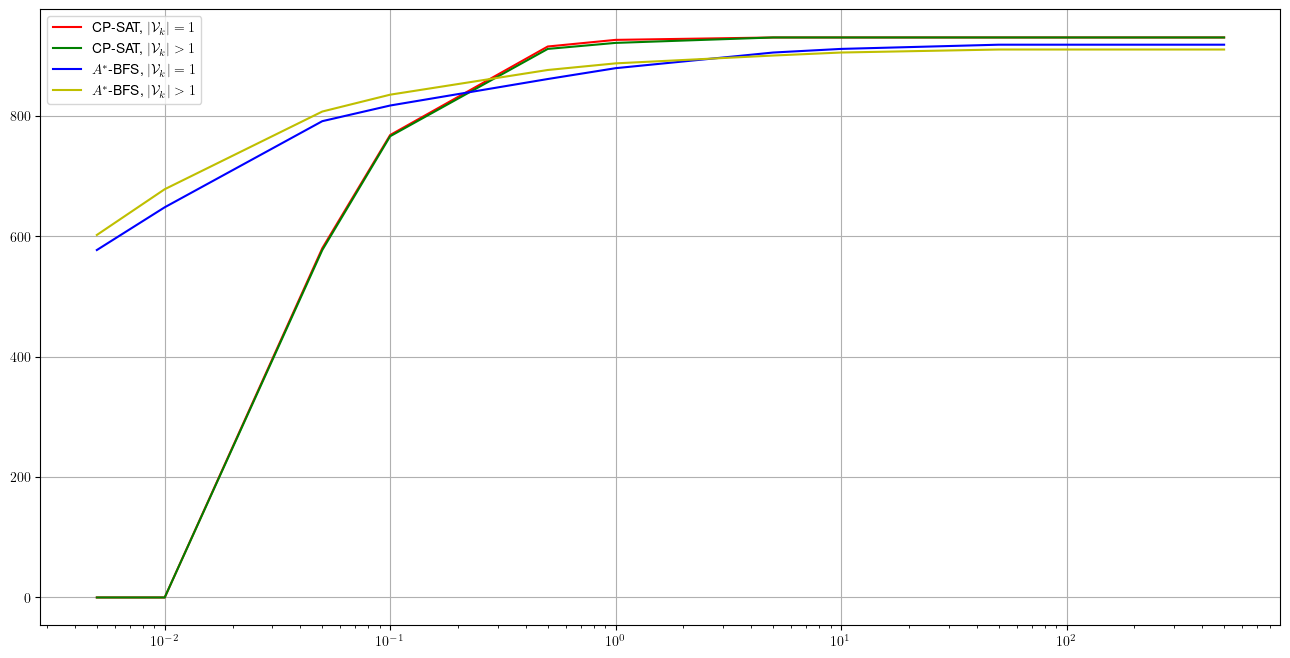

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(time_breakpoints, coverage['halton.cp_sat.single_edge'], 'r-', label=r'CP-SAT, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['halton.cp_sat.multi_edge'], 'g-', label=r'CP-SAT, $\vert {\cal V}_k \vert>1$')
ax.plot(time_breakpoints, coverage['halton.a_star.single_edge'], 'b-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['halton.a_star.multi_edge'], 'y-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert>1$')
ax.set_xscale('log')
ax.grid(True)
ax.legend()

plt.show()

## Uniform Sequence Planners

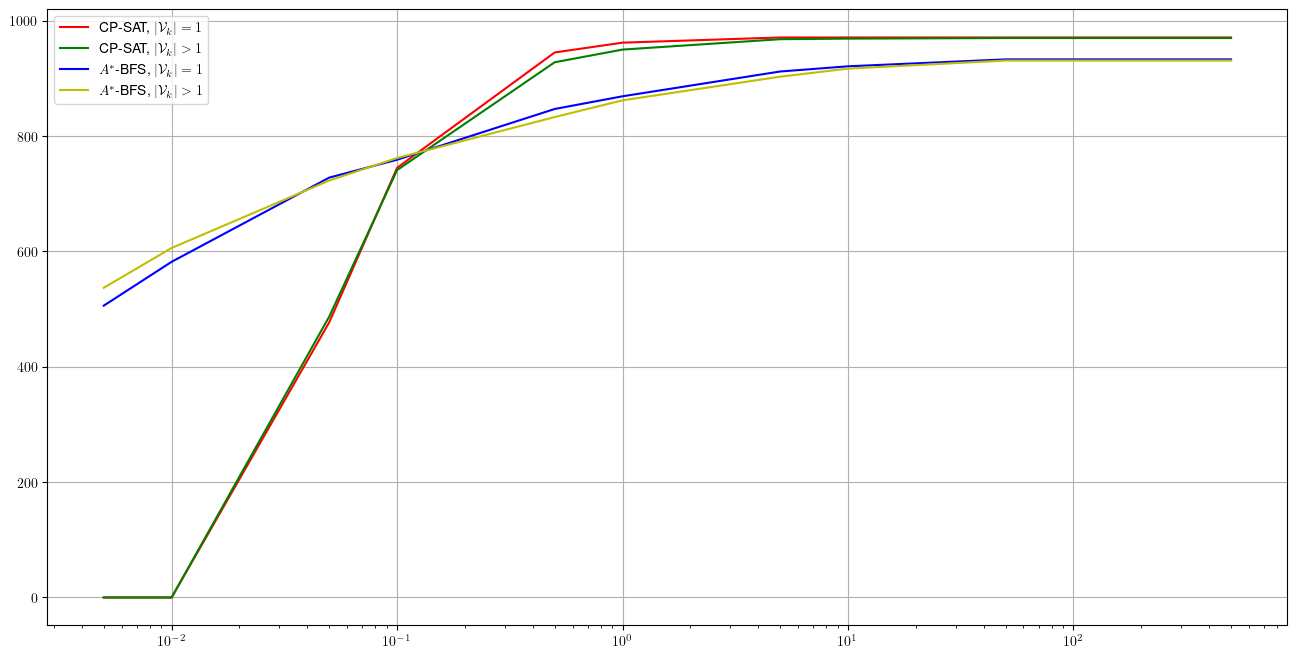

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(time_breakpoints, coverage['uniform.cp_sat.single_edge'], 'r-', label=r'CP-SAT, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['uniform.cp_sat.multi_edge'], 'g-', label=r'CP-SAT, $\vert {\cal V}_k \vert>1$')
ax.plot(time_breakpoints, coverage['uniform.a_star.single_edge'], 'b-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert=1$')
ax.plot(time_breakpoints, coverage['uniform.a_star.multi_edge'], 'y-', label=r'$A^*$-BFS, $\vert {\cal V}_k \vert>1$')
ax.set_xscale('log')
ax.grid(True)
ax.legend()

plt.show()

With uniform sampling, we see that the CP-SAT based planners catch up with the DP planners at the 0.1 seconds mark.

# Plan Quality Comparison

In which we compare the approximated arc-length of the smooth plans found by the planners considered

## Halton Sequence Planners

In [163]:
table = tables['halton.cp_sat.multi_edge']
filtered_table = table[table['iterations']>1]

cp_sat_multi = filtered_table[['instance', 'seed', 'smooth_cost_k']]

table = tables['halton.cp_sat.single_edge']
filtered_table = table[table['iterations']>1]

cp_sat_single = filtered_table[['instance', 'seed', 'smooth_cost_k']]

halton_costs_combined = pd.merge(cp_sat_multi, cp_sat_single, on=['instance', 'seed'], suffixes=('.multi', '.single'))

In [164]:
halton_costs_combined

,instance,seed,smooth_cost_k.multi,smooth_cost_k.single
0,instance_023,42,10.163610,10.163610
1,instance_054,567,10.163610,10.163610
2,instance_100,42,11.680051,10.850611
3,instance_114,8193,10.063682,10.063682
4,instance_273,567,10.349802,10.349802
...,...,...,...,...
925,instance_175,567,10.163610,10.163610
926,instance_239,1337,10.446020,10.175085
927,instance_275,8193,10.333877,10.260880
928,instance_005,1,11.637189,11.637189


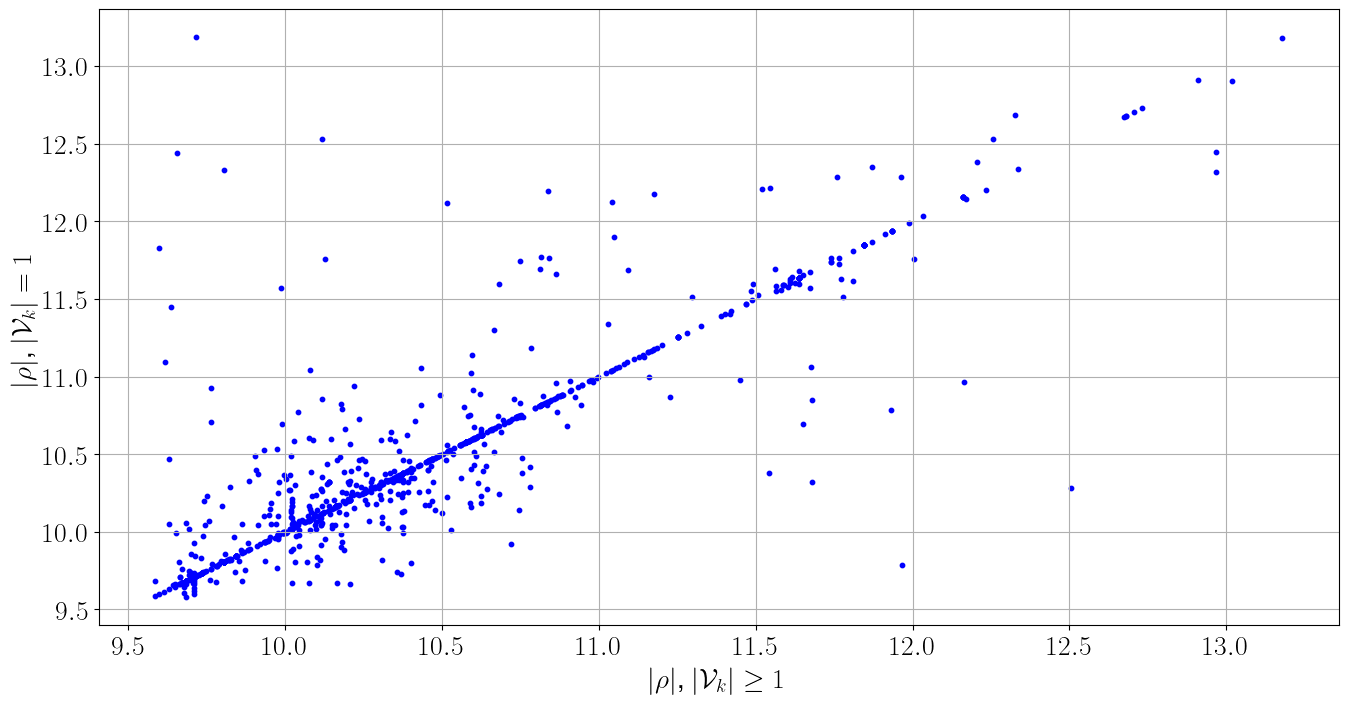

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.scatter(halton_costs_combined['smooth_cost_k.multi'], halton_costs_combined['smooth_cost_k.single'], color='blue', s=10)
ax.set_xlabel(r'$\vert \rho \vert$, $\vert {\cal V}_k \vert \geq 1$')
ax.set_ylabel(r'$\vert \rho \vert$, $\vert {\cal V}_k \vert = 1$')
ax.grid(True)
for l in ax.get_xticklabels():
    l.set_fontsize(20)
for l in ax.get_yticklabels():
    l.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

plt.show()

In [166]:
multi_better = (halton_costs_combined['smooth_cost_k.multi'] < halton_costs_combined['smooth_cost_k.single']).sum()

In [167]:
multi_better

234

In [168]:
single_better = (halton_costs_combined['smooth_cost_k.multi'] > halton_costs_combined['smooth_cost_k.single']).sum()

In [169]:
single_better

193

In [170]:
len(halton_costs_combined)

930

Single edge cuts seem to lead to slightly worse plans that multiple-edge cuts, but the difference does not seem to be signifcant. Using multi-edge cuts ${\cal V}_k$ results in better plans than using single-edge cuts in 234 out of 930 runs, and worse plans are obtained in 193 out of 1,500 runs.

## Uniform Sequence Planners

In [171]:
table = tables['uniform.cp_sat.multi_edge']
filtered_table = table[table['iterations']>1]
cp_sat_multi = filtered_table[['instance', 'seed', 'smooth_cost_k']]
table = tables['uniform.cp_sat.single_edge']
filtered_table = table[table['iterations']>1]
cp_sat_single = filtered_table[['instance', 'seed', 'smooth_cost_k']]

uniform_costs_combined = pd.merge(cp_sat_multi, cp_sat_single, on=['instance', 'seed'], suffixes=('.multi', '.single'))

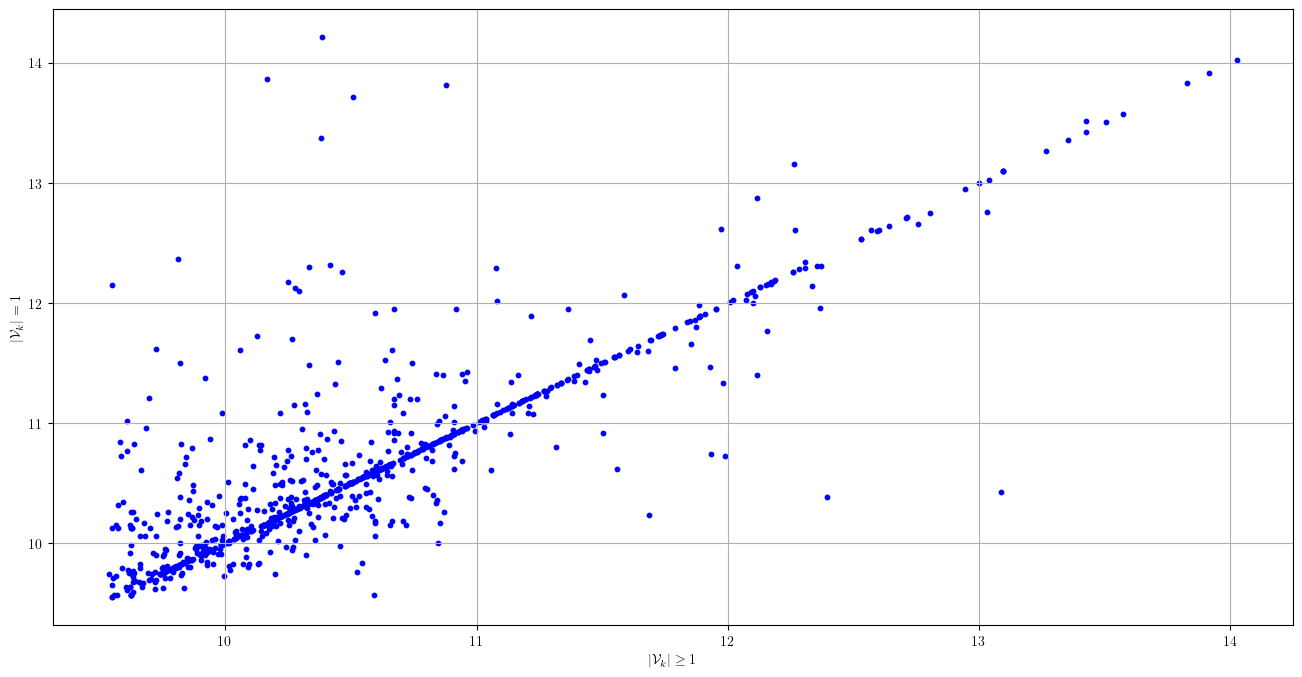

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.scatter(uniform_costs_combined['smooth_cost_k.multi'], uniform_costs_combined['smooth_cost_k.single'], color='blue',
           s=10)
ax.set_xlabel(r'$\vert {\cal V}_k \vert \geq 1$')
ax.set_ylabel(r'$\vert {\cal V}_k \vert = 1$')
ax.grid(True)

plt.show()

In [173]:
multi_better = (uniform_costs_combined['smooth_cost_k.multi'] < uniform_costs_combined['smooth_cost_k.single']).sum()
single_better = (uniform_costs_combined['smooth_cost_k.multi'] > uniform_costs_combined['smooth_cost_k.single']).sum()

print("Multi-edge better than single in {} instances, worse in {} instances".format(multi_better, single_better))

Multi-edge better than single in 343 instances, worse in 200 instances


The observations obtained for the Halton based sequence is similar, but more pronounced.

# Plan Length and Run-time Comparison

In which we assess how plan length affects runtimes depending on the choice of algorithm

## Halton Sequence

In [174]:
table = tables['halton.cp_sat.multi_edge']
filtered_table = table #table[table['iterations']>1]

cp_sat_multi = filtered_table[['instance', 'seed', 'plan_time', 'plan_length']]

table = tables['halton.a_star.multi_edge']
filtered_table = table # table[table['iterations']>1]

a_star_multi = filtered_table[['instance', 'seed', 'plan_time', 'plan_length']]

halton_plan_len_combined = pd.merge(cp_sat_multi, a_star_multi, on=['instance', 'seed'], suffixes=('.cp_sat', '.a_star'))

In [175]:
halton_plan_len_combined

,instance,seed,plan_time.cp_sat,plan_length.cp_sat,plan_time.a_star,plan_length.a_star
0,instance_027,42,0.014957,5,0.000147,5
1,instance_276,567,0.009832,6,0.000146,6
2,instance_048,1,0.008968,4,0.000112,4
3,instance_023,42,0.027647,5,0.000700,5
4,instance_178,1337,0.008525,6,0.000155,6
...,...,...,...,...,...,...
1475,instance_041,42,0.014940,5,0.000129,5
1476,instance_275,8193,0.027719,6,0.000411,6
1477,instance_176,1,0.011317,6,0.000139,6
1478,instance_005,1,0.034574,6,0.010805,6


In [176]:
halton_plan_len_combined['plan_length.cp_sat'].describe()

count    1480.000000
mean        5.803378
std         1.077705
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        11.000000
Name: plan_length.cp_sat, dtype: float64

In [177]:
halton_plan_len_combined['plan_length.a_star'].describe()

count    1480.000000
mean        5.776351
std         1.059735
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        10.000000
Name: plan_length.a_star, dtype: float64

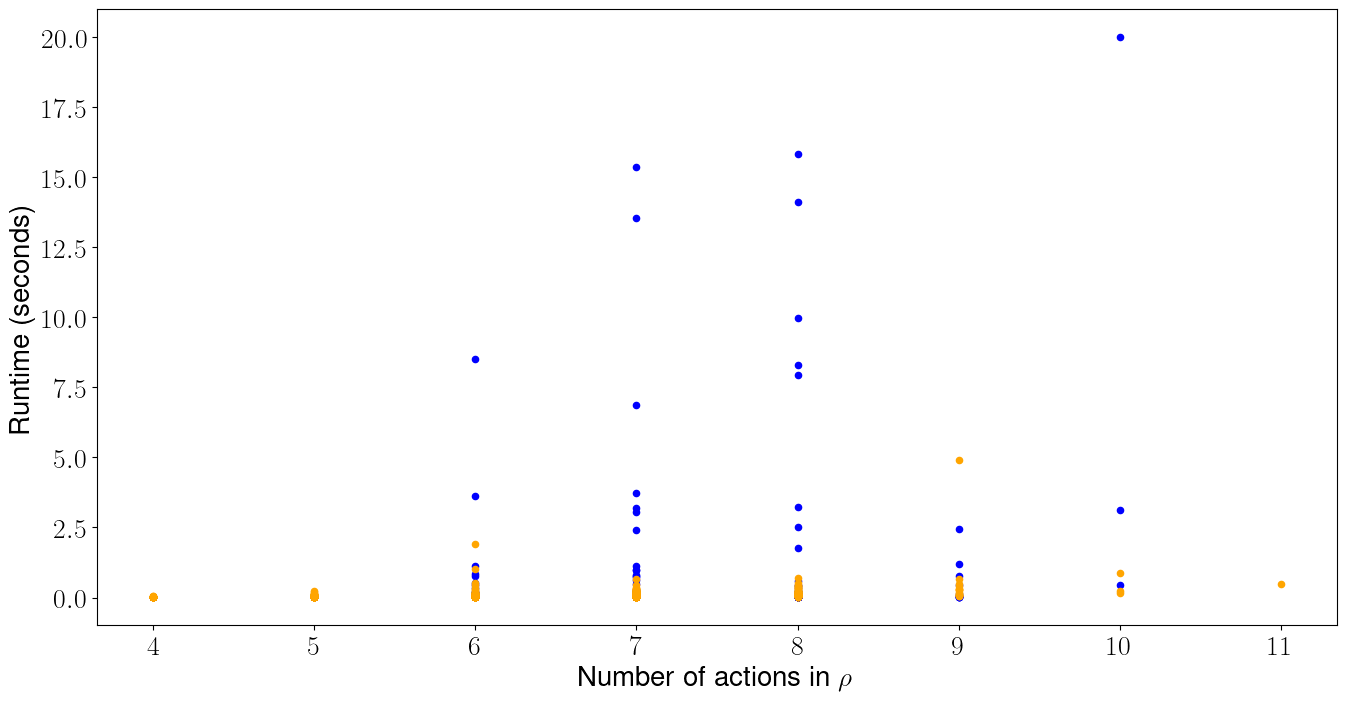

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.scatter(halton_plan_len_combined['plan_length.a_star'], halton_plan_len_combined['plan_time.a_star'], color='blue', s=20)
ax.scatter(halton_plan_len_combined['plan_length.cp_sat'], halton_plan_len_combined['plan_time.cp_sat'], color='orange', s=20)
ax.set_xlabel(r'Number of actions in $\rho$')
ax.set_ylabel(r'Runtime (seconds)')
for l in ax.get_xticklabels():
    l.set_fontsize(20)
for l in ax.get_yticklabels():
    l.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
#ax.grid(True)

plt.show()

## Uniform Sequence

In [179]:
table = tables['uniform.cp_sat.multi_edge']
filtered_table = table #table[table['iterations']>1]

cp_sat_multi = filtered_table[['instance', 'seed', 'plan_time', 'plan_length']]

table = tables['uniform.a_star.multi_edge']
filtered_table = table # table[table['iterations']>1]

a_star_multi = filtered_table[['instance', 'seed', 'plan_time', 'plan_length']]

uniform_plan_len_combined = pd.merge(cp_sat_multi, a_star_multi, on=['instance', 'seed'], suffixes=('.cp_sat', '.a_star'))

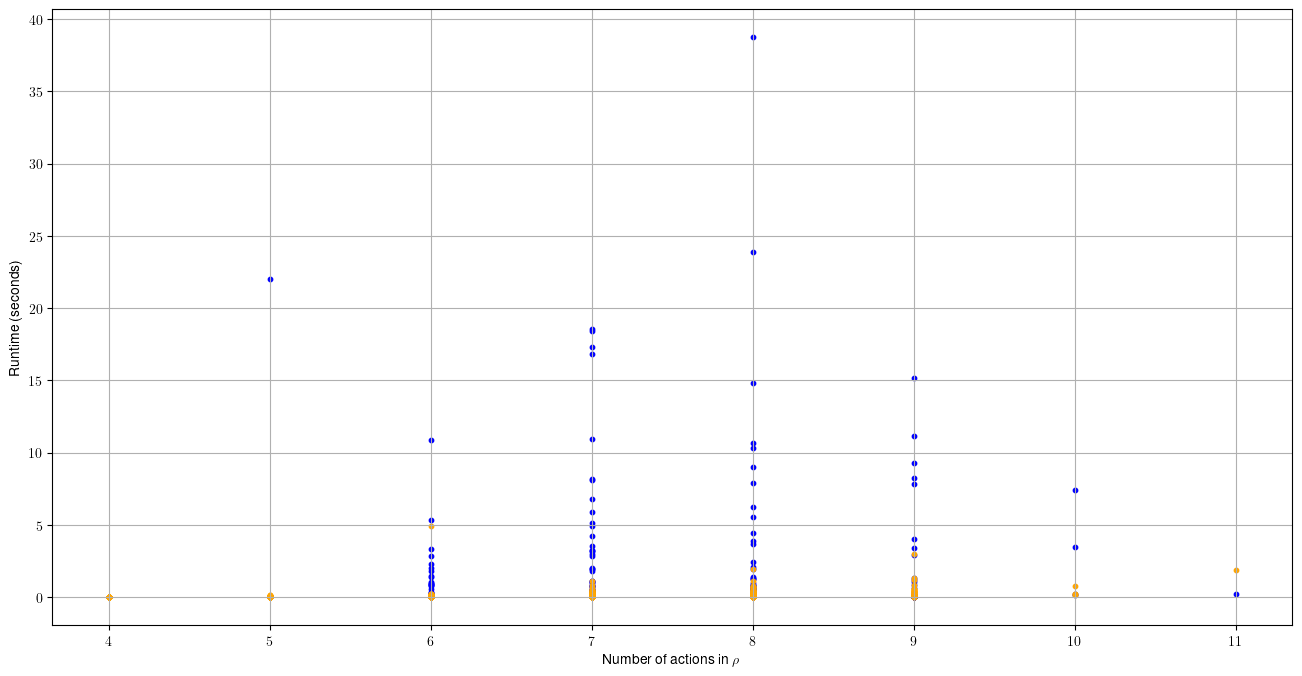

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.scatter(uniform_plan_len_combined['plan_length.a_star'], uniform_plan_len_combined['plan_time.a_star'], color='blue', s=10)
ax.scatter(uniform_plan_len_combined['plan_length.cp_sat'], uniform_plan_len_combined['plan_time.cp_sat'], color='orange', s=10)
ax.set_xlabel(r'Number of actions in $\rho$')
ax.set_ylabel(r'Runtime (seconds)')
ax.grid(True)

plt.show()